# >>>>>>>>>>>>>>>>>>>>>>>PlayStation vs. XBox<<<<<<<<<<<<<<<<<<<


<p style="align: center;"><img align=center src="https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2Fa3708b27-283b-4476-abf7-efeb690049a8.jpg?fit=scale-down&source=next&width=700"  width=500></p>

### Ответим на следующие вопросы: 

 1) Как критики и юзеры относятся к шутерам?  
 2) Критикам и юзерам нравятся больше игры на XBOneX или на PS4?  
 3) Критикам и юзерам нравятся больше игры на XBox или на PlayStation?  
 4) Критикам больше нравятся стрелялки или приключения?  
 5) Юзерам больше нравятся стрелялки или приключения?

Для каждого вопроса:

- сформулируем нулевую и альтернативную гипотезы;  
- выберем пороговый уровень статистической значимости;  
- опишем полученные результаты статистического теста.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 11,5
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('games.txt')
df['User_Score'].replace('tbd', np.NaN, inplace=True)
df['Year_of_Release'] = df.Year_of_Release.astype('Int64')
df['User_Count'] = df.User_Count.astype('Int64')
df['User_Score'] = df.User_Score.astype('Float64')
df['Critic_Count'] = df.Critic_Count.astype('Int64')
df['Critic_Score'] = df.Critic_Score.astype('Float64')
df['User_Score'] = df['User_Score'] * 10
df.loc[df.Platform.isin(['PS', 'PS2', 'PS3', 'PS4']), 'Platform_devs'] = 'PlayStation'
df.loc[df.Platform.isin(['X360', 'XB', 'XOne']), 'Platform_devs'] = 'XBox'
df.loc[df.Platform.isin(['DS', 'Wii', '3DS', 'N64', 'SNES', 'SAT', 'WiiU', 'NES', 'GB']), 'Platform_devs'] = 'Nintendo'
df.loc[df.Platform.isin(['GBA', 'GEN', 'SCD', 'GG']), 'Platform_devs'] = 'Sega'
df.loc[df.Platform.isin(['PSV', 'PSP']), 'Platform_devs'] = 'PlayStationPortable'
df.loc[df.Platform.isin(['3DO', 'GC', '2600', 'PC', 'DC', 'NG', 'WS', 'TG16', 'PCFX']), 'Platform_devs'] = 'Other'
df.dropna(subset=['Name'], inplace=True)
#df.drop(df.columns[[14, 15]], axis=1, inplace=True)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_devs
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,80.0,322,Nintendo,E,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,83.0,709,Nintendo,E,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,80.0,192,Nintendo,E,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN,PlayStation
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN,XBox
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN,PlayStationPortable
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN,Sega


In [3]:
critic_games = df[['Name', 'Year_of_Release', 'Genre', 'Platform', 'Critic_Score', 'Critic_Count', 'Platform_devs']]
critic_games = critic_games.loc[critic_games['Critic_Score'] > 0]
critic_games

,Name,Year_of_Release,Genre,Platform,Critic_Score,Critic_Count,Platform_devs
0,Wii Sports,2006,Sports,Wii,76.0,51,Nintendo
2,Mario Kart Wii,2008,Racing,Wii,82.0,73,Nintendo
3,Wii Sports Resort,2009,Sports,Wii,80.0,73,Nintendo
6,New Super Mario Bros.,2006,Platform,DS,89.0,65,Nintendo
7,Wii Play,2006,Misc,Wii,58.0,41,Nintendo
...,...,...,...,...,...,...,...
16700,Breach,2011,Shooter,PC,61.0,12,Other
16701,Bust-A-Move 3000,2003,Puzzle,GC,53.0,4,Other
16702,Mega Brain Boost,2008,Puzzle,DS,48.0,10,Nintendo
16706,STORM: Frontline Nation,2011,Strategy,PC,60.0,12,Other


In [4]:
critic_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8137 non-null   object 
 1   Year_of_Release  7983 non-null   Int64  
 2   Genre            8137 non-null   object 
 3   Platform         8137 non-null   object 
 4   Critic_Score     8137 non-null   float64
 5   Critic_Count     8137 non-null   Int64  
 6   Platform_devs    8137 non-null   object 
dtypes: Int64(2), float64(1), object(4)
memory usage: 524.5+ KB


In [5]:
critic_games.describe()

,Year_of_Release,Critic_Score,Critic_Count
count,7983.000000,8137.000000,8137.000000
mean,2007.192785,68.967679,26.360821
std,4.189425,13.938165,18.980495
min,1985.000000,13.000000,3.000000
25%,2004.000000,60.000000,12.000000
50%,2007.000000,71.000000,21.000000
75%,2010.000000,79.000000,36.000000
max,2016.000000,98.000000,113.000000


In [6]:
user_games = df[['Name', 'Year_of_Release', 'Genre', 'Platform', 'User_Score', 'User_Count', 'Platform_devs']]
user_games = user_games.loc[user_games['User_Count'] > 0]
user_games.dropna(subset=['Platform'], inplace=True)
user_games

,Name,Year_of_Release,Genre,Platform,User_Score,User_Count,Platform_devs
0,Wii Sports,2006,Sports,Wii,80.0,322,Nintendo
2,Mario Kart Wii,2008,Racing,Wii,83.0,709,Nintendo
3,Wii Sports Resort,2009,Sports,Wii,80.0,192,Nintendo
6,New Super Mario Bros.,2006,Platform,DS,85.0,431,Nintendo
7,Wii Play,2006,Misc,Wii,66.0,129,Nintendo
...,...,...,...,...,...,...,...
16685,Worms 2,1997,Strategy,PC,81.0,12,Other
16696,Metal Gear Solid V: Ground Zeroes,2014,Action,PC,76.0,412,Other
16700,Breach,2011,Shooter,PC,58.0,43,Other
16706,STORM: Frontline Nation,2011,Strategy,PC,72.0,13,Other


In [7]:
user_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 16709
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7590 non-null   object 
 1   Year_of_Release  7463 non-null   Int64  
 2   Genre            7590 non-null   object 
 3   Platform         7590 non-null   object 
 4   User_Score       7590 non-null   float64
 5   User_Count       7590 non-null   Int64  
 6   Platform_devs    7590 non-null   object 
dtypes: Int64(2), float64(1), object(4)
memory usage: 489.2+ KB


In [8]:
user_games.describe()

,Year_of_Release,User_Score,User_Count
count,7463.000000,7590.000000,7590.000000
mean,2007.686855,71.250461,162.229908
std,4.296115,15.000061,561.282326
min,1985.000000,0.000000,4.000000
25%,2004.000000,64.000000,10.000000
50%,2008.000000,75.000000,24.000000
75%,2011.000000,82.000000,81.000000
max,2016.000000,97.000000,10665.000000


### 1.1 Как критики относятся к шутерам?

In [9]:
critic_score = critic_games.groupby('Genre').Critic_Score.mean().reset_index().sort_values('Critic_Score', ascending=False)
critic_score

,Genre,Critic_Score
7,Role-Playing,72.652646
11,Strategy,72.086093
10,Sports,71.968174
8,Shooter,70.181144
2,Fighting,69.217604
9,Simulation,68.619318
4,Platform,68.058350
6,Racing,67.963612
5,Puzzle,67.424107
0,Action,66.629101


In [10]:
mean_critic_score = critic_games.groupby('Genre').mean()['Critic_Score'].mean()
mean_critic_score

68.89591006609139

In [11]:
critic_count = critic_games.groupby('Genre').Critic_Count.sum().reset_index().sort_values('Critic_Count', ascending=False)
critic_count

,Genre,Critic_Count
0,Action,52506
8,Shooter,33616
10,Sports,25110
7,Role-Playing,23945
6,Racing,17087
4,Platform,11778
2,Fighting,11415
3,Misc,11262
11,Strategy,8538
9,Simulation,7549


##### Из полученных df видно, следующее:  
 - средняя оценка для шутеров, в рейтинге критиков средних оценок по всем жанрам, стоит на 4-м месте (из 12) и ее значение больше средней оценки по всем жанрам (70.2 > 68.9);  
 - активность выставления оценок критиками для шутеров, так же выше среднего и стоит на 2-м месте.
 
##### Соответственно можно сделать вывод, что критикам нравятся стрелялки.

#### Гипотезы.
##### H0: Критикам нравятся шутеры, в среднем, не более, чем в среднем по всем жанрам, т.е. Shooter.Critic_Score.mean() <= mean_critic_score
##### H1: Критикам нравятся шутеры, в среднем, более, чем в среднем по всем жанрам, т.е. Shooter.Critic_Score.mean() > mean_critic_score

In [12]:
shooter_critic_score = critic_games.loc[critic_games.Genre.str.contains('Shooter')]
shooter_critic_score

,Name,Year_of_Release,Genre,Platform,Critic_Score,Critic_Count,Platform_devs
29,Call of Duty: Modern Warfare 3,2011,Shooter,X360,88.0,81,XBox
32,Call of Duty: Black Ops,2010,Shooter,X360,87.0,89,XBox
34,Call of Duty: Black Ops II,2012,Shooter,PS3,83.0,21,PlayStation
35,Call of Duty: Black Ops II,2012,Shooter,X360,83.0,73,XBox
36,Call of Duty: Modern Warfare 2,2009,Shooter,X360,94.0,100,XBox
...,...,...,...,...,...,...,...
16433,Greg Hastings' Tournament Paintball Max'd,2006,Shooter,PS2,70.0,8,PlayStation
16452,Inversion,<NA>,Shooter,PC,59.0,6,Other
16541,Clive Barker's Jericho,2007,Shooter,PC,63.0,25,Other
16581,Space Raiders,2003,Shooter,GC,40.0,8,Other


In [13]:
alpha = 0.05
result = st.ttest_1samp(shooter_critic_score['Critic_Score'], mean_critic_score, alternative='greater')

print(shooter_critic_score['Critic_Score'].mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее значение оценок критиков для шутеров больше 68.9 (шутеры критикам нравятся)')
else:
    print('Не отвергаем нулевую гипотезу, шутеры критикам не нравятся')
    
print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

70.18114406779661
Ttest_1sampResult(statistic=2.713491509798112, pvalue=0.003389607879188569)
Отвергаем нулевую гипотезу, среднее значение оценок критиков для шутеров больше 68.9 (шутеры критикам нравятся)
Пороговый уровень статистической значимости равен : 0.3389607879188569 %


Text(0.5, 1.0, 'Распределение оценок критиков для шутеров')

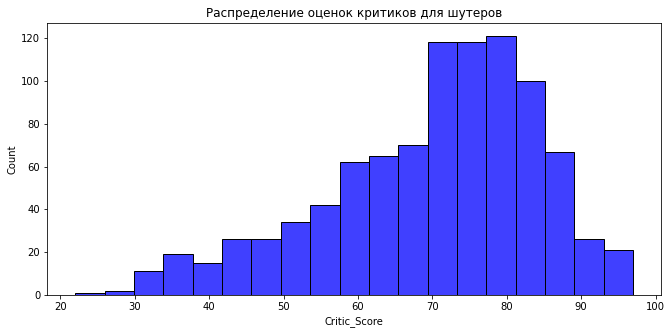

In [14]:
sns.histplot(shooter_critic_score, x='Critic_Score', color='blue')
plt.title('Распределение оценок критиков для шутеров')

###### Среднее значение оценок критиков для шутеров 70.2 что выше среднего значения оценок по всем жанрам.
###### Значение p-value очень низкое, что без всяких сомнений дает нам право отвергнуть нулевую гипотезу.
###### Значение t-статистики положительно, и подтверждает то, что cреднее значение оценок критиков для шутеров больше среднего значения оценок критиков по всем жанрам.

### 1.2 Как юзеры относятся к шутерам?

In [15]:
user_score = user_games.groupby('Genre').User_Score.mean().reset_index().sort_values('User_Score', ascending=False)
user_score

,Genre,User_Score
7,Role-Playing,76.195155
2,Fighting,73.025063
4,Platform,73.014019
11,Strategy,72.951768
5,Puzzle,71.750000
9,Simulation,71.345930
1,Adventure,71.330000
0,Action,70.540437
8,Shooter,70.418831
6,Racing,70.361934


In [16]:
mean_user_score = user_games.groupby('Genre').mean()['User_Score'].mean()
mean_user_score

71.56156057348035

In [17]:
user_count = user_games.groupby('Genre').User_Count.sum().reset_index().sort_values('User_Count', ascending=False)
user_count

,Genre,User_Count
8,Shooter,346110
0,Action,345668
7,Role-Playing,238315
11,Strategy,61025
4,Platform,46707
10,Sports,45849
6,Racing,44468
1,Adventure,31023
9,Simulation,28434
2,Fighting,25907


##### Из полученных df видно, следующее:  
 - средняя оценка для шутеров, в рейтинге юзеров средних оценок по всем жанрам, стоит на 9-м месте (из 12) и ее значение меньше средней оценки по всем жанрам (70.4 < 71.6);  
 - активность выставления оценок юзерами для шутеров в топе, на 1-м месте.
 
##### Соответственно можно сделать вывод, что юзерам стрелялки не нравятся, но интерес проявлен не малый. Оценок выставлено много (больше чем по остальным жанрам), но они низкие. 

#### Гипотезы.
###### # H0: Юзерам нравятся шутеры, в среднем, не более, чем в среднем по всем жанрам, т.е. Shooter.User_Score.mean() <= mean_user_score
###### # H1: Юзерам нравятся шутеры, в среднем, более, чем в среднем по всем жанрам, т.е. Shooter.User_Score.mean() > mean_user_score

In [18]:
shooter_user_score = user_games.loc[user_games.Genre.str.contains('Shooter')]
shooter_user_score

,Name,Year_of_Release,Genre,Platform,User_Score,User_Count,Platform_devs
29,Call of Duty: Modern Warfare 3,2011,Shooter,X360,34.0,8713,XBox
32,Call of Duty: Black Ops,2010,Shooter,X360,63.0,1454,XBox
34,Call of Duty: Black Ops II,2012,Shooter,PS3,53.0,922,PlayStation
35,Call of Duty: Black Ops II,2012,Shooter,X360,48.0,2256,XBox
36,Call of Duty: Modern Warfare 2,2009,Shooter,X360,63.0,2698,XBox
...,...,...,...,...,...,...,...
16415,Conflict: Denied Ops,2008,Shooter,PC,48.0,54,Other
16433,Greg Hastings' Tournament Paintball Max'd,2006,Shooter,PS2,92.0,32,PlayStation
16452,Inversion,<NA>,Shooter,PC,67.0,107,Other
16541,Clive Barker's Jericho,2007,Shooter,PC,75.0,218,Other


In [19]:
alpha = 0.05
result = st.ttest_1samp(shooter_user_score['User_Score'], mean_user_score, alternative='greater')

print(shooter_user_score['User_Score'].mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее значение оценок юзеров для шутеров больше 69 (юзеры критикам нравятся)')
else:
    print('Не отвергаем нулевую гипотезу, шутеры юзерам не нравятся')

print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

70.41883116883118
Ttest_1sampResult(statistic=-2.2881437868411214, pvalue=0.98882276546403)
Не отвергаем нулевую гипотезу, шутеры юзерам не нравятся
Пороговый уровень статистической значимости равен : 98.882276546403 %


Text(0.5, 1.0, 'Распределение оценок юзеров для шутеров')

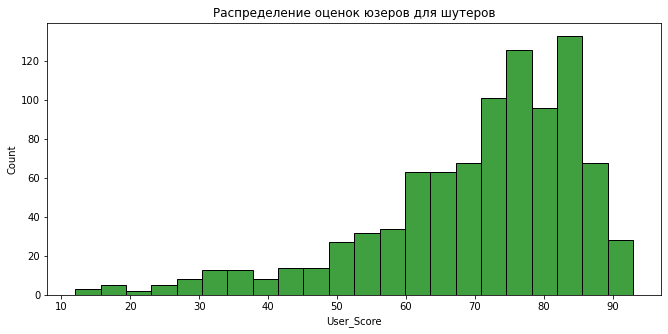

In [20]:
sns.histplot(shooter_user_score, x='User_Score', color='green')
plt.title('Распределение оценок юзеров для шутеров')

###### Среднее значение оценок юзеров для шутеров 70.4 что ниже среднего значения оценок по всем жанрам (71.6).
###### Значение p-value очень высокое, поэтому мы не отвергаем нулевую гипотезу.
###### Значение t-статистики отрицательно, и подтверждает то, что cреднее значение оценок юзеров для шутеров меньше среднего значения оценок юзеров по всем жанрам.

#### Вывод. Критикам наравятся шутеры, а юзерам - не нравятся.

### 2.1 Критикам нравятся больше игры на XBOneX или на PS4?

In [5]:
critic_score_platforms = critic_games.groupby('Platform').Critic_Score.mean().reset_index()
critic_score_two_platforms = critic_score_platforms.sort_values('Critic_Score', ascending=False)\
                                                   .loc[critic_score_platforms.Platform.isin(['XOne','PS4'])]
critic_score_two_platforms

,Platform,Critic_Score
16,XOne,73.325444
9,PS4,72.091270


In [6]:
critic_score_platforms_mode = critic_games[['Platform', 'Critic_Score']]
critic_score_platforms_mode.loc[critic_score_platforms_mode.Platform.isin(['XOne','PS4'])].mode()

,Platform,Critic_Score
0,PS4,73.0
1,NaN,80.0


In [23]:
critic_count_platforms = critic_games.groupby('Platform').Critic_Count.sum().reset_index()
critic_count_platforms.sort_values('Critic_Count', ascending=False).loc[critic_count_platforms.Platform.isin(['XOne','PS4'])]

,Platform,Critic_Count
9,PS4,9820
16,XOne,4126


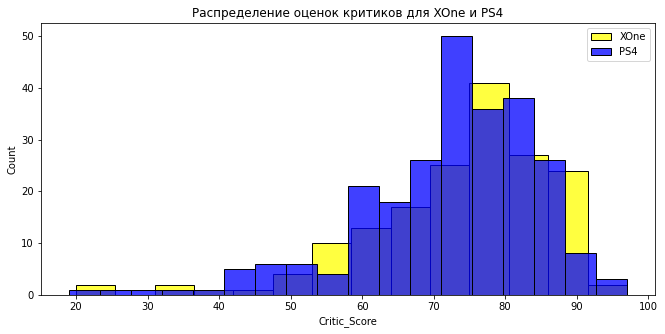

In [24]:
critic_XOne = critic_games.loc[critic_games.Platform.str.contains('XOne')]
critic_PS4 = critic_games.loc[critic_games.Platform.str.contains('PS4')]
sns.histplot(critic_XOne, x='Critic_Score', color='yellow')
sns.histplot(critic_PS4, x='Critic_Score', color='blue')
plt.title('Распределение оценок критиков для XOne и PS4')
plt.legend(critic_score_two_platforms.Platform.unique())

##### Из полученных df видно, следующее:  
 - средняя оценка критиков для XBOneX больше чем для PS4 (73.3 > 72.1);   
 - самая часто выстывляемая оценка критиков "73.0" для PS4;  
 - активность выставления оценок критиками для PS4 больше в два раза, чем для XBOneX.
 
##### Соответственно, можно сделать вывод, что критикам почти одинаково нравятся игры на XBOneX и на PS4. (На XBOneX чуть больше). Распределение оценок на визуализации это подтверждает.

#### Гипотезы.
###### H0: Критикам нравятся игры на PS4 не менее, чем на XBOneX, т.е. PS4.Critic_Score.mean() >= XOne.Critic_Score.mean()
###### H1: Критикам нравятся игры на PS4 меньше, чем на XBOneX, т.е. PS4.Critic_Score.mean() < XOne.Critic_Score.mean()

In [25]:
alpha = 0.05
result = st.ttest_ind(critic_XOne.Critic_Score, critic_PS4.Critic_Score, equal_var = False)

print('Разница средних значений оценок критиков по платформам (XOne - PS4): ',\
      round(critic_XOne.Critic_Score.mean() - critic_PS4.Critic_Score.mean(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее значение оценок критиков для PS4 меньше среднего значения оценок для XBOneX \
                    (критикам больше нравятся игры на XBOneX, чем на PS4)')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся игры на PS4 не меньше чем на XBOneX')
    
print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

Разница средних значений оценок критиков по платформам (XOne - PS4):  1.23
Ttest_indResult(statistic=0.9722111994610444, pvalue=0.3316144158059794)
Не отвергаем нулевую гипотезу, критикам нравятся игры на PS4 не меньше чем на XBOneX
Пороговый уровень статистической значимости равен : 33.16144158059794 %


###### Разница средних значений оценок критиков для игр на XBOneX и PS4 равна 1.23, что говорит о том, что критикам больше нравятся игры на XBOneX, чем на PS4.
###### Значение p-value высокое, при котором мы не можем отвергнуть нулевую гипотезу при уровне значимости 5%.
###### Значение t-статистики положительно, и подтверждает то, что критикам больше нравятся игры на XBOneX, чем на PS4.

### 2.2 Юзерам нравятся больше игры на XBOneX или на PS4?

In [26]:
user_score_platforms = user_games.groupby('Platform').User_Score.mean().reset_index()
user_score_two_platforms = user_score_platforms.sort_values('User_Score', ascending=False)\
                                                   .loc[user_score_platforms.Platform.isin(['XOne','PS4'])]
user_score_two_platforms

,Platform,User_Score
9,PS4,67.482490
16,XOne,65.214286


In [27]:
user_score_platforms_mode = user_games[['Platform', 'User_Score']]
user_score_platforms_mode.loc[user_score_platforms_mode.Platform.isin(['XOne','PS4'])].mode()

,Platform,User_Score
0,PS4,71.0
1,NaN,81.0


In [28]:
user_count_platforms = user_games.groupby('Platform').User_Count.sum().reset_index()
user_count_platforms.sort_values('User_Count', ascending=False).loc[user_count_platforms.Platform.isin(['XOne','PS4'])]

,Platform,User_Count
9,PS4,133166
16,XOne,52010


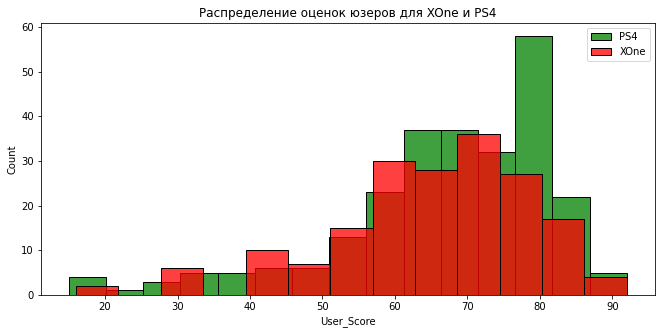

In [29]:
user_XOne = user_games.loc[user_games.Platform.str.contains('XOne')]
user_PS4 = user_games.loc[user_games.Platform.str.contains('PS4')]
sns.histplot(user_PS4, x='User_Score', color='green')
sns.histplot(user_XOne, x='User_Score', color='red')
plt.title('Распределение оценок юзеров для XOne и PS4')
plt.legend(user_score_two_platforms.Platform.unique())

##### Из полученных df видно, следующее:  
 - средняя оценка юзеров для PS4 больше чем для XBOneX (67.5 > 65.2);   
 - самая часто выстывляемая оценка юзеров "71.0" для PS4;  
 - активность выставления оценок юзерами для PS4 больше в два с половиной раза, чем для XBOneX.
 
##### Соответственно, можно сделать вывод, что юзерам больше нравятся игры на PS4, чем на XBOneX. Распределение оценок на визуализации это подтверждает.

#### Гипотезы.
###### H0: Юзерам нравятся игры на XBOneX не менее, чем на PS4, т.е. XOne.Critic_Score.mean() >= PS4.Critic_Score.mean()
###### H1: Юзерам нравятся игры на XBOneX меньше, чем на PS4, т.е. XOne.Critic_Score.mean() < PS4.Critic_Score.mean()

In [30]:
alpha = 0.05
result = st.ttest_ind(user_XOne.User_Score, user_PS4.User_Score, equal_var = False)

print('Разница средних значений оценок критиков по платформам (PS4 - XOne): ',\
      round(user_PS4.User_Score.mean() - user_XOne.User_Score.mean(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее значение оценок юзеров для XBOneX меньше среднего значения оценок для PS4 \
                    (юзерам больше нравятся игры на PS4, чем на XBOneX)')
else:
    print('Не отвергаем нулевую гипотезу, юзерам нравятся игры на XBOneX не меньше чем на PS4')
    
print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

Разница средних значений оценок критиков по платформам (PS4 - XOne):  2.27
Ttest_indResult(statistic=-1.6557440803308, pvalue=0.09855299487302413)
Не отвергаем нулевую гипотезу, юзерам нравятся игры на XBOneX не меньше чем на PS4
Пороговый уровень статистической значимости равен : 9.855299487302412 %


###### Разница средних значений оценок юзеров для игр на PS4 и XBOneX равна 2.27, что говорит о том, что юзерам больше нравятся игры на PS4, чем на XBOneX.
###### Значение p-value высокое, при котором мы не можем отвергнуть нулевую гипотезу, при 5-ти процентном уровне значимости.

#### Вывод. Критикам чуть больше нравятся игры на XBoneX, чем на PS4, а юзерам - наоборот. В целом - большой разницы нет.

### 3.1 Критикам нравятся больше игры на XBox или на PlayStation?

In [31]:
critic_score_platform_devs = critic_games.groupby('Platform_devs').Critic_Score.mean().reset_index()
critic_score_two_platform_devs = critic_score_platform_devs.sort_values('Critic_Score', ascending=False)\
                                 .loc[critic_score_platform_devs.Platform_devs.isin(['XBox','PlayStation'])]
critic_score_two_platform_devs

,Platform_devs,Critic_Score
2,PlayStation,69.802335
5,XBox,69.554144


In [32]:
critic_score_platform_devs_mode = critic_games[['Platform_devs', 'Critic_Score']]
critic_score_platform_devs_mode.loc[critic_score_platform_devs_mode.Platform_devs.isin(['XBox','PlayStation'])].mode()

,Platform_devs,Critic_Score
0,PlayStation,71.0


In [33]:
critic_count_platform_devs = critic_games.groupby('Platform_devs').Critic_Count.sum().reset_index()
critic_count_platform_devs.sort_values('Critic_Count', ascending=False)\
                          .loc[critic_count_platform_devs.Platform_devs.isin(['XBox','PlayStation'])]

,Platform_devs,Critic_Count
2,PlayStation,70240
5,XBox,61828


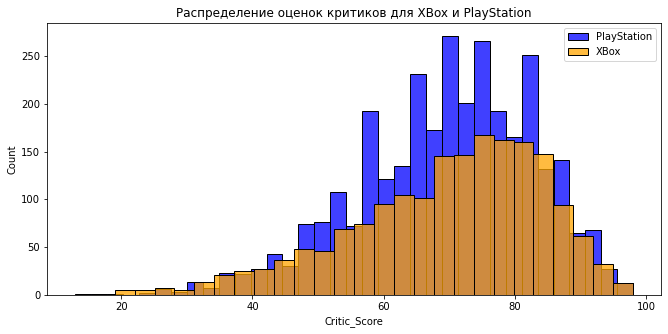

In [34]:
critic_XBox = critic_games.loc[critic_games.Platform_devs.str.contains('XBox')]
critic_PlayStation = critic_games.loc[critic_games.Platform_devs.str.contains('PlayStation')]
sns.histplot(critic_PlayStation, x='Critic_Score', color='blue')
sns.histplot(critic_XBox, x='Critic_Score', color='orange')
plt.title('Распределение оценок критиков для XBox и PlayStation')
plt.legend(critic_score_two_platform_devs.Platform_devs.unique())

##### Из полученных df видно, следующее:  
 - средняя оценка критиков для PlayStation чуть больше чем для XBox (69.8 > 69.6);   
 - самая часто выстывляемая оценка критиков "71.0" для PlayStation;  
 - активность выставления оценок критиками для PlayStation так же чуть больше, чем для XBox.
 
##### Соответственно, можно сделать вывод, что критикам почти одинаково нравятся игры на PlayStation и на XBox.

#### Гипотезы.
###### H0: Критикам нравятся игры на XBox не менее, чем на PlayStation т.е. XBox.Critic_Score.mean() >= PlayStation.Critic_Score.mean()
###### H1: Критикам нравятся игры на XBox меньше, чем на PlayStation, т.е. XBox.Critic_Score.mean() < PlayStation.Critic_Score.mean()

In [35]:
alpha = 0.05
result = st.ttest_ind(critic_XBox.Critic_Score, critic_PlayStation.Critic_Score, equal_var = False)

print('Разница средних значений оценок критиков по платформам (XBox - PlayStation): ',\
      round(critic_XBox.Critic_Score.mean() - critic_PlayStation.Critic_Score.mean(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее значение оценок критиков для PlayStation меньше среднего значения оценок для\
            XBox (критикам больше нравятся игры на XBox, чем на PlayStation)')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся игры на PlayStation не меньше чем на XBox')
    
print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

Разница средних значений оценок критиков по платформам (XBox - PlayStation):  0.06
Ttest_indResult(statistic=0.15083163260468913, pvalue=0.8801171830041199)
Не отвергаем нулевую гипотезу, критикам нравятся игры на PlayStation не меньше чем на XBox
Пороговый уровень статистической значимости равен : 88.01171830041199 %


###### Разница средних значений оценок критиков для игр на XBox и PlayStation равна 0.06, что говорит о том, что критикам чуть больше нравятся игры на XBox, чем на PlayStation.
###### Значение p-value очень высокое, при котором мы не отвергаем нулевую гипотезу при уровне значимости 5%.
###### Значение t-статистики положительно, и указывает на то, что критикам больше нравятся игры на XBox, чем на PlayStation.

### 3.2 Юзерам нравятся больше игры на XBox или на PlayStation?

In [36]:
user_score_platform_devs = user_games.groupby('Platform_devs').User_Score.mean().reset_index()
user_score_two_platform_devs = user_score_platform_devs.sort_values('User_Score', ascending=False)\
                               .loc[user_score_platform_devs.Platform_devs.isin(['XBox','PlayStation'])]
user_score_two_platform_devs

,Platform_devs,User_Score
2,PlayStation,72.418605
5,XBox,69.426182


In [37]:
user_score_platform_devs_mode = user_games[['Platform_devs', 'User_Score']]
user_score_platform_devs_mode.loc[user_score_platform_devs_mode.Platform_devs.isin(['XBox','PlayStation'])].mode()

,Platform_devs,User_Score
0,PlayStation,78.0


In [38]:
user_count_platform_devs = user_games.groupby('Platform_devs').User_Count.sum().reset_index()
user_count_platform_devs.sort_values('User_Count', ascending=False)\
                        .loc[user_count_platform_devs.Platform_devs.isin(['XBox','PlayStation'])]

,Platform_devs,User_Count
2,PlayStation,379883
5,XBox,247019


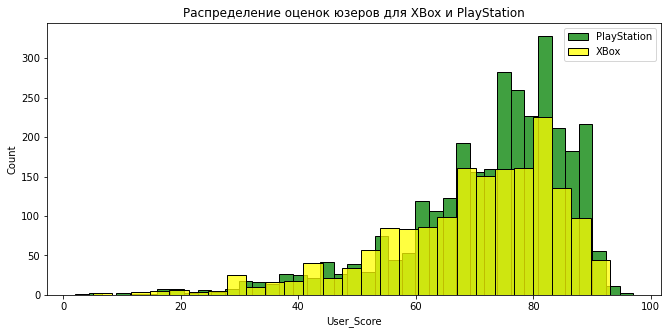

In [39]:
user_XBox = user_games.loc[user_games.Platform_devs.str.contains('XBox')]
user_PlayStation = user_games.loc[user_games.Platform_devs.str.contains('PlayStation')]
sns.histplot(user_PlayStation, x='User_Score', color='green')
sns.histplot(user_XBox, x='User_Score', color='yellow')
plt.title('Распределение оценок юзеров для XBox и PlayStation')
plt.legend(user_score_two_platform_devs.Platform_devs.unique())

##### Из полученных df видно, следующее:  
 - средняя оценка юзеров для PlayStation больше чем для XBox (72.4 > 69.4);   
 - самая часто выстывляемая оценка критиков "78.0" для PlayStation;  
 - активность выставления оценок критиками для PlayStation в полтора раза больше, чем для XBox.
 
##### Соответственно, можно сделать вывод, что юзерам больше нравятся игры на PlayStation чем на XBox.

#### Гипотезы.
###### H0: Юзерам нравятся игры на XBox не менее, чем на PlayStation т.е. XBox.User_Score.mean() >= PlayStation.User_Score.mean()
###### H1: Юзерам нравятся игры на XBox меньше, чем на PlayStation, т.е. XBox.User_Score.mean() < PlayStation.User_Score.mean()

In [40]:
alpha = 0.05
result = st.ttest_ind(user_XBox.User_Score, user_PlayStation.User_Score, equal_var = False)

print('Разница средних значений оценок критиков по платформам (PlayStation - XBox): ',\
      round(user_PlayStation.User_Score.mean() - user_XBox.User_Score.mean(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее значение оценок юзеров для XBox меньше среднего значения оценок для PlayStation\
                    (юзерам больше нравятся игры на PlayStation, чем на XBox)')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся игры на XBox не меньше чем на PlayStation')
    
print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

Разница средних значений оценок критиков по платформам (PlayStation - XBox):  3.02
Ttest_indResult(statistic=-6.7965317639060565, pvalue=1.2600160460610901e-11)
Отвергаем нулевую гипотезу, среднее значение оценок юзеров для XBox меньше среднего значения оценок для PlayStation                    (юзерам больше нравятся игры на PlayStation, чем на XBox)
Пороговый уровень статистической значимости равен : 1.2600160460610901e-09 %


###### Разница средних значений оценок юзеров для игр на XBox и PlayStation равна 3.02, что говорит о том, что юзерам больше нравятся игры на PlayStation, чем на XBox.
###### Значение p-value низкое, при котором мы отвергаем нулевую гипотезу при уровне значимости 5%.
###### Значение t-статистики отрицательно.

#### Вывод. Критикам чуть больше, почти одинаково, нравятся игры на XBox, чем на PlayStation, а юзерам, однозначно, игры на PlayStation, нравятся больше, чем на XBox.

<p style="align: left;">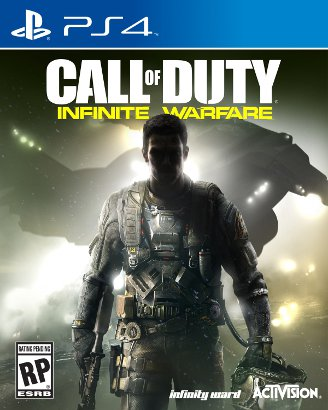</p>
<p style="align: right;">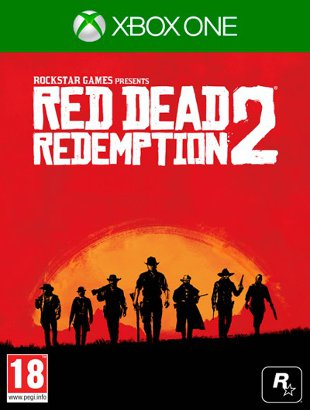</p>

### 4. Критикам больше нравятся шутеры или приключения?

In [41]:
critic_score_genres = critic_games.groupby('Genre').Critic_Score.mean().reset_index()
critic_score_two_genres = critic_score_genres.sort_values('Critic_Score', ascending=False)\
                                             .loc[critic_score_genres.Genre.isin(['Shooter', 'Adventure'])]
critic_score_two_genres

,Genre,Critic_Score
8,Shooter,70.181144
1,Adventure,65.331269


In [42]:
critic_score_genres_mode = critic_games[['Genre', 'Critic_Score']]
critic_score_genres_mode.loc[critic_score_genres_mode.Genre.isin(['Shooter', 'Adventure'])].mode()

,Genre,Critic_Score
0,Shooter,78.0


In [43]:
critic_count_genres = critic_games.groupby('Genre').Critic_Count.sum().reset_index()
critic_count_genres.sort_values('Critic_Count', ascending=False).loc[critic_count_genres.Genre.isin(['Shooter', 'Adventure'])]

,Genre,Critic_Count
8,Shooter,33616
1,Adventure,7143


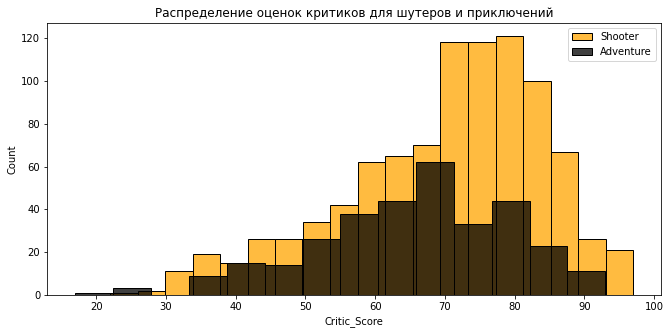

In [44]:
Shooter = critic_games.loc[critic_games.Genre.str.contains('Shooter')]
Adventure = critic_games.loc[critic_games.Genre.str.contains('Adventure')]
sns.histplot(Shooter, x='Critic_Score', color='orange')
sns.histplot(Adventure, x='Critic_Score', color='black')
plt.title('Распределение оценок критиков для шутеров и приключений')
critic_score_plt = critic_score_two_genres.sort_values('Critic_Score', ascending=True)
plt.legend(critic_score_two_genres.Genre.unique())

##### Из полученных df видно, следующее:  
 - средняя оценка для Шутеров больше, чем для Приключений (70.2 > 65.3);   
 - при этом самая часто выстывляемая оценка "78.0" принадлежит Шутерам;  
 - и активность выставления оценок критиками за Шутеры больше в 4,7 раза, чем за Приключения;  
 - визуализация показывает, что для Шутеров оценки критиками выставлялись активнее, чем для Приключений.

##### Исходя из полученных рузультатов предполагаю, что критикам больше нравятся Шутеры, чем Приключения.

#### Гипотезы.
###### H0: Критикам нравятся Приключения не менее, чем Шутеры, т.е. Adventure.Critic_Count.sum() >= Shooter.Critic_Count.sum()
###### H1: Критикам нравятся Приключения меньше, чем Шутеры, т.е. Adventure.Critic_Count.sum() < Shooter.Critic_Count.sum()

In [45]:
alpha = 0.05
result = st.ttest_ind(Shooter.Critic_Count, Adventure.Critic_Count, equal_var = False)

print('Отношение количества критиков, выставляемых оценки по жанрам (Shooter / Adventure): ',\
      round(Shooter.Critic_Count.sum() / Adventure.Critic_Count.sum(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, количество критиков, выставляемых оценок для Приключений меньше количества критиков, \
выставляемых оценки для Шутеров (критикам больше нравятся Шутеры, чем Приключения)')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся Приключения не меньше чем Шутеры')
    
print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

Отношение количества критиков, выставляемых оценки по жанрам (Shooter / Adventure):  4.71
Ttest_indResult(statistic=10.857710912880462, pvalue=2.397473516259628e-25)
Отвергаем нулевую гипотезу, количество критиков, выставляемых оценок для Приключений меньше количества критиков, выставляемых оценки для Шутеров (критикам больше нравятся Шутеры, чем Приключения)
Пороговый уровень статистической значимости равен : 2.3974735162596278e-23 %


###### Отношение средних значений количеств критиков, выставляемых оценки по жанрам (Shooter / Adventure) равна 4.71, что говорит о том, что критики больше проявляют интерес к Шутерам, чем к Приключениям.
###### Значение p-value низкое, при котором мы, без сомнений,  отвергаем нулевую гипотезу.
###### Значение t-статистики положительно, и подтверждает то, что критикам больше нравятся Шутеры, чем Приключения.

#### Гипотезы.
###### H0: Критикам нравятся Приключения не менее, чем Шутеры, т.е. Adventure.Critic_Score.mean() >= Shooter.Critic_Score.mean()
###### H1: Критикам нравятся Приключения меньше, чем Шутеры, т.е. Adventure.Critic_Score.mean() < Shooter.Critic_Score.mean()

In [46]:
alpha = 0.05
result = st.ttest_ind(Shooter.Critic_Score, Adventure.Critic_Score, equal_var = False)

print('Разница средних значений оценок критиков по жанрам (Shooter - Adventure): ',\
      round(Shooter.Critic_Score.mean() - Adventure.Critic_Score.mean(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее значение оценок критиков для Приключений меньше среднего значения оценок\
                    критиков для Шутеров (критикам больше нравятся Шутеры, чем Приключения)')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся Приключения не меньше чем Шутеры')
    
print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

Разница средних значений оценок критиков по жанрам (Shooter - Adventure):  4.85
Ttest_indResult(statistic=5.341798187717518, pvalue=1.323648972273686e-07)
Отвергаем нулевую гипотезу, среднее значение оценок критиков для Приключений меньше среднего значения оценок                    критиков для Шутеров (критикам больше нравятся Шутеры, чем Приключения)
Пороговый уровень статистической значимости равен : 1.323648972273686e-05 %


#### Вывод. Критикам, однозначно, больше нравятся игры в жанре Шутеры, чем Приключения.

### 5. Юзерам больше нравятся симуляторы или бои?

In [47]:
user_score_genres = user_games.groupby('Genre').User_Score.mean().reset_index()
user_score_two_genres = user_score_genres.sort_values('User_Score', ascending=False)\
                                         .loc[user_score_genres.Genre.isin(['Simulation', 'Fighting'])]
user_score_two_genres

,Genre,User_Score
2,Fighting,73.025063
9,Simulation,71.345930


In [48]:
user_score_genres_mode = user_games[['Genre', 'User_Score']]
user_score_genres_mode.loc[user_score_genres_mode.Genre.isin(['Simulation', 'Fighting'])].mode()

,Genre,User_Score
0,Fighting,79.0


In [49]:
user_count_genres = user_games.groupby('Genre').User_Count.sum().reset_index()
user_count_genres.sort_values('User_Count', ascending=False).loc[user_count_genres.Genre.isin(['Simulation', 'Fighting'])]

,Genre,User_Count
9,Simulation,28434
2,Fighting,25907


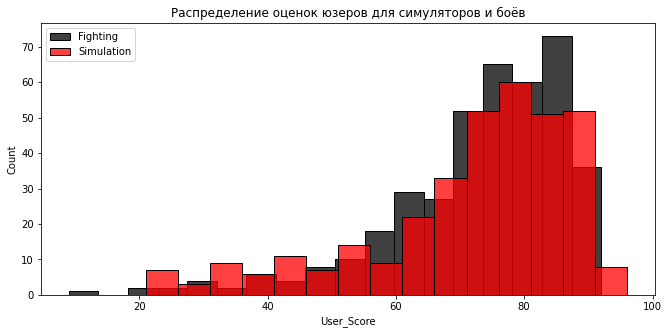

In [50]:
Simulation = user_games.loc[user_games.Genre.str.contains('Simulation')]
Fighting = user_games.loc[user_games.Genre.str.contains('Fighting')]
sns.histplot(Fighting, x='User_Score', color='black')
sns.histplot(Simulation, x='User_Score', color='red')
plt.title('Распределение оценок юзеров для симуляторов и боёв')
user_score_plt = user_score_two_genres.sort_values('User_Score', ascending=True)
plt.legend(user_score_two_genres.Genre.unique())

##### Из полученных df видно, следующее:  
 - средняя оценка для Боёв больше, чем для Симуляторов (73.0 > 71.4);   
 - самая часто выстывляемая оценка "79.0" принадлежит Боям;  
 - активность выставления оценок юзерами за Симуляторы больше, чем за Бои. 

#### Гипотезы.
###### H0: Юзерам нравятся Симуляторы не менее, чем Бои, т.е. Simulation.User_Score.mean() >= Fighting.User_Score.mean()
###### H1: Критикам нравятся Симуляторы меньше, чем Бои, т.е. Simulation.User_Score.mean() < Fighting.User_Score.mean()

In [51]:
alpha = 0.05
result = st.ttest_ind(Fighting.User_Score, Simulation.User_Score, equal_var = False)

print('Разница средних значений оценок юзеров по жанрам (Fighting - Simulation): ',\
      round(Fighting.User_Score.mean() - Simulation.User_Score.mean(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее значение оценок юзеров для Бои меньше среднего значения оценок юзеров\
                      для Симуляторов (критикам больше нравятся Симуляторы, чем Бои)')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся Симуляторы не меньше чем Бои')
    
print('Пороговый уровень статистической значимости равен :', result.pvalue*100, '%')

Разница средних значений оценок юзеров по жанрам (Fighting - Simulation):  1.68
Ttest_indResult(statistic=1.497428653471629, pvalue=0.13474356860563838)
Не отвергаем нулевую гипотезу, критикам нравятся Симуляторы не меньше чем Бои
Пороговый уровень статистической значимости равен : 13.474356860563837 %


###### Разница средних значений оценок юзеров для игр в жанрах Бои и Симуляторы равна 1.68, что говорит о том, что юзерам больше нравятся Бои, чем Симуляторы.
###### Значение p-value высокое, при котором мы не отвергаем нулевую гипотезу при уровне значимости 5%.
###### Значение t-статистики положительно, что подтверждает больший интерес к Боям нежели к Симуляторам.

#### Вывод. Юзерам чуть больше нравятся игры в жанре Бои, чем Симуляторы.

In [52]:
print('TOP10 игр наиболее понравившихся критикам: ')
critic_games.groupby('Name').Critic_Score.mean().reset_index().sort_values('Critic_Score', ascending=False).head(10)

TOP10 игр наиболее поравившихся критикам: 


,Name,Critic_Score
3877,SoulCalibur,98.0
2553,Metroid Prime,97.0
2828,NFL 2K1,97.0
4104,Super Mario Galaxy,97.0
4105,Super Mario Galaxy 2,97.0
1735,Grand Theft Auto V,96.8
4582,Tony Hawk's Pro Skater 2,96.5
4216,Tekken 3,96.0
4718,Uncharted 2: Among Thieves,96.0
1720,Gran Turismo,96.0


In [53]:
print('TOP10 игр наиболее понравившихся юзерам: ')
user_games.groupby('Name').User_Score.mean().reset_index().sort_values('User_Score', ascending=False).head(10)

TOP10 игр наиболее поравившихся юзерам: 


,Name,User_Score
467,Breath of Fire III,97.0
428,Boktai: The Sun is in Your Hand,96.0
1730,Harvest Moon: Friends of Mineral Town,96.0
710,Cory in the House,95.0
3805,Super Puzzle Fighter II,95.0
1589,Golden Sun: The Lost Age,95.0
1948,Karnaaj Rally,95.0
2168,MLB SlugFest Loaded,95.0
4452,Wade Hixton's Counter Punch,95.0
596,Castlevania: Symphony of the Night,94.0


In [54]:
print('TOP10 игр с наибольшим количеством оценок критиков: ')
critic_games.groupby('Name').Critic_Count.sum().reset_index().sort_values('Critic_Count', ascending=False).head(10)

TOP10 игр с наибольшим количеством оценок критиков: 


,Name,Critic_Count
3909,Spider-Man 2,252
1735,Grand Theft Auto V,245
2947,Need for Speed: Most Wanted,236
4574,Tomb Raider: Legend,217
2453,Mass Effect 2,215
2357,Madden NFL 07,215
563,Call of Duty: Black Ops,214
568,Call of Duty: Modern Warfare 2,207
2449,Marvel: Ultimate Alliance,204
3421,Resident Evil 5,197


In [55]:
print('TOP10 игр с наибольшим количеством оценок юзеров: ')
user_games.groupby('Name').User_Count.sum().reset_index().sort_values('User_Count', ascending=False).head(10)

TOP10 игр с наибольшим количеством оценок юзеров: 


,Name,User_Count
4138,The Witcher 3: Wild Hunt,24807
553,Call of Duty: Modern Warfare 3,20053
3960,The Elder Scrolls V: Skyrim,15189
1617,Grand Theft Auto V,15124
1313,Fallout 4,13489
2292,Mass Effect 3,11500
552,Call of Duty: Modern Warfare 2,11201
367,BioShock Infinite,10832
923,Diablo III,10570
714,Counter-Strike: Source,9851


In [56]:
print('TOP10 жанров наиболее понравившихся критикам: ')
critic_games.groupby('Genre').Critic_Score.mean().reset_index().sort_values('Critic_Score', ascending=False).head(10)

TOP10 жанров наиболее поравившихся критикам: 


,Genre,Critic_Score
7,Role-Playing,72.652646
11,Strategy,72.086093
10,Sports,71.968174
8,Shooter,70.181144
2,Fighting,69.217604
9,Simulation,68.619318
4,Platform,68.058350
6,Racing,67.963612
5,Puzzle,67.424107
0,Action,66.629101


In [57]:
print('TOP10 жанров наиболее понравившихся юзерам: ')
user_games.groupby('Genre').User_Score.mean().reset_index().sort_values('User_Score', ascending=False).head(10)

TOP10 жанров наиболее поравившихся юзерам: 


,Genre,User_Score
7,Role-Playing,76.195155
2,Fighting,73.025063
4,Platform,73.014019
11,Strategy,72.951768
5,Puzzle,71.750000
9,Simulation,71.345930
1,Adventure,71.330000
0,Action,70.540437
8,Shooter,70.418831
6,Racing,70.361934


In [58]:
print('TOP5 платформ наиболее понравившихся критикам: ')
critic_games.groupby('Platform').Critic_Score.mean().reset_index().sort_values('Critic_Score', ascending=False).head(5)

TOP5 платформ наиболее поравившихся критикам: 


,Platform,Critic_Score
1,DC,87.357143
5,PC,75.928671
16,XOne,73.325444
9,PS4,72.091270
6,PS,71.515000


In [59]:
print('TOP5 платформ наиболее понравившихся юзерам: ')
user_games.groupby('Platform').User_Score.mean().reset_index().sort_values('User_Score', ascending=False).head(5)

TOP5 платформ наиболее поравившихся юзерам: 


,Platform,User_Score
1,DC,85.285714
6,PS,78.654321
3,GBA,76.768627
7,PS2,76.268332
4,GC,75.975410


In [60]:
print('TOP5 производителей платформ наиболее понравившихся критикам: ')
critic_games.groupby('Platform_devs').Critic_Score.mean().reset_index().sort_values('Critic_Score', ascending=False).head(5)

TOP5 производителей платформ наиболее поравившихся критикам: 


,Platform_devs,Critic_Score
1,Other,73.613424
2,PlayStation,69.802335
5,XBox,69.554144
3,PlayStationPortable,68.118557
4,Sega,67.372146


In [61]:
print('TOP5 производителей платформ наиболее понравившихся юзерам: ')
user_games.groupby('Platform_devs').User_Score.mean().reset_index().sort_values('User_Score', ascending=False).head(5)

TOP5 производителей платформ наиболее поравившихся юзерам: 


,Platform_devs,User_Score
4,Sega,76.768627
3,PlayStationPortable,72.556738
1,Other,72.506087
2,PlayStation,72.418605
5,XBox,69.426182


In [62]:
print('Год релиза игр с наиболее понравившимися критикам: ')
critic_games.groupby('Year_of_Release').Critic_Score.mean().reset_index().sort_values('Critic_Score', ascending=False).head(1)

Год релиза игр с наиболее поравившимися критикам: 


,Year_of_Release,Critic_Score
4,1996,89.875


In [63]:
print('Год релиза игр с наиболее понравившимися юзерам: ')
user_games.groupby('Year_of_Release').User_Score.mean().reset_index().sort_values('User_Score', ascending=False).head(1)

Год релиза игр с наиболее поравившимися юзерам: 


,Year_of_Release,User_Score
6,1998,85.064516


# >>>>>>>>>>>>>>>>>>>>>>>>>>Need For Speed<<<<<<<<<<<<<<<<<<<<<<

<p style="align: center;"><img align=center src="https://habrastorage.org/r/w1560/webt/rk/ef/bs/rkefbs644yosebylyieuugjgbkq.png"  width=700></p>

In [5]:
NFS = df.loc[df['Name'].str.contains('Need')]
NFS['Genre'] = NFS['Genre'].apply(lambda x: 'Racing' if x == 'Action' else x)

<ipython-input-5-526354df59ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NFS['Genre'] = NFS['Genre'].apply(lambda x: 'Racing' if x == 'Action' else x)


In [6]:
NFS

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_devs
102,Need for Speed Underground,PS2,2003,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20,85.0,33,86.0,171,EA Black Box,E,PlayStation
113,Need for Speed Underground 2,PS2,2004,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90,82.0,39,86.0,132,EA Canada,E,PlayStation
253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36,91.0,137,EA Canada,T,PlayStation
440,Need for Speed III: Hot Pursuit,PS,1998,Racing,Electronic Arts,2.14,0.86,0.00,0.13,3.12,88.0,13,NaN,<NA>,EA Canada,E,PlayStation
523,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,<NA>,NaN,<NA>,NaN,NaN,PlayStation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682,Need for Speed: Shift,PC,2009,Racing,Electronic Arts,0.00,0.05,0.00,0.01,0.06,83.0,22,58.0,387,Slightly Mad Studios,E,Other
13306,Need for Speed Carbon,PC,2006,Racing,Electronic Arts,0.00,0.04,0.00,0.01,0.05,78.0,17,72.0,249,Black Box,E10+,Other
13348,Need for Speed Underground,PC,2003,Racing,Electronic Arts,0.00,0.04,0.00,0.01,0.05,82.0,24,83.0,307,Black Box,E,Other
13691,Need for Speed: ProStreet,PC,2007,Racing,Electronic Arts,0.00,0.04,0.00,0.01,0.04,70.0,18,59.0,163,EA Games,E10+,Other


In [7]:
user_NFS = NFS.loc[NFS['User_Score'] > 0]
critic_NFS = NFS.loc[NFS['Critic_Score'] > 0]

In [8]:
print('NFS версия, наиболее понравившаяся юзерам: ')
user_NFS.sort_values('User_Score', ascending=False).head(2)

NFS версия, наиболее понравившаяся юзерам: 


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_devs
3581,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18,91.0,22,EA Canada,T,Other
253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36,91.0,137,EA Canada,T,PlayStation


In [9]:
print('NFS версия, наименее понравившаяся юзерам: ')
user_NFS.sort_values('User_Score').head(1)

NFS версия, наименее понравившаяся юзерам: 


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_devs
6683,Need for Speed Rivals,PC,2013,Racing,Electronic Arts,0.04,0.19,0.0,0.02,0.25,76.0,16,33.0,546,Ghost Games,E10+,Other


In [10]:
print('NFS версия, наиболее понравившаяся критикам: ')
critic_NFS.query('Critic_Score == {}'.format(critic_NFS['Critic_Score'].max())).head()

NFS версия, наиболее понравившаяся критикам: 


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_devs
536,Need for Speed: Hot Pursuit,PS3,2010,Racing,Electronic Arts,1.05,1.23,0.03,0.47,2.78,89.0,59,72.0,301,Criterion Games,E10+,PlayStation
782,Need for Speed: Hot Pursuit 2,PS2,2002,Racing,Electronic Arts,1.68,0.31,0.02,0.09,2.11,89.0,31,85.0,92,Black Box,E,PlayStation


In [11]:
print('NFS версия, наименее понравившаяся критикам: ')
critic_NFS.query('Critic_Score == {}'.format(critic_NFS['Critic_Score'].min())).head()

NFS версия, наименее понравившаяся критикам: 


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_devs
6411,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.0,0.02,0.27,45.0,4,61.0,22,EA Canada,E,Nintendo


In [53]:
# Количество платформ каждой версии игры NFS
NFS_count_names = pd.DataFrame(NFS.groupby('Name').Genre.count().reset_index().sort_values('Genre', ascending=False))
NFS_count_names.columns = ['Name', 'Count']
NFS_count_names

,Name,Count
12,Need for Speed: Most Wanted,12
16,Need for Speed: ProStreet,7
1,Need For Speed: Undercover,7
3,Need for Speed Carbon,7
8,Need for Speed Underground 2,6
6,Need for Speed Rivals,5
7,Need for Speed Underground,5
19,Need for Speed: The Run,5
17,Need for Speed: Shift,4
10,Need for Speed: Hot Pursuit,4


In [36]:
NFS.Global_Sales.sum()

101.20000000000002

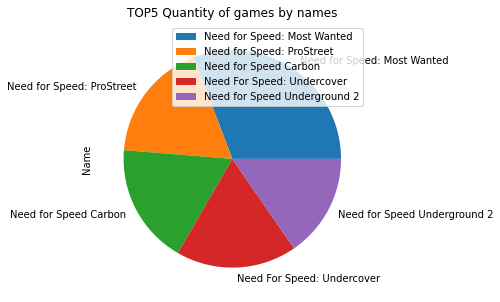

In [51]:
# ТОР5 количество игр по версиям
top_pie_name = NFS['Name'].value_counts().sort_values(ascending = False).head(5)
top_pie_name.plot(kind='pie', title='TOP5 Quantity of games by names')
plt.legend()

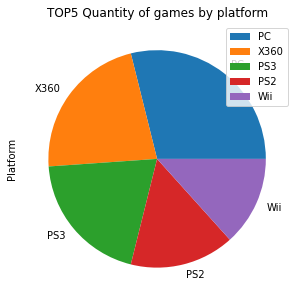

In [52]:
# количество игр по платформам
top_pie_platforms = NFS['Platform'].value_counts().sort_values(ascending = False).head(5)
top_pie_platforms.plot(kind='pie', title='TOP5 Quantity of games by platform')
plt.legend()

In [59]:
NFS_MW = df.loc[df.Name == 'Need for Speed: Most Wanted']
NFS_MW

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_devs
253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36,91.0,137,PlayStation
523,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,<NA>,NaN,<NA>,PlayStation
1190,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54,85.0,134,XBox
1591,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54,85.0,134,XBox
1998,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32,88.0,29,XBox
2048,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.33,0.45,0.01,0.22,1.01,NaN,<NA>,NaN,<NA>,PlayStationPortable
3581,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18,91.0,22,Other
5973,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19,85.0,525,Other
6274,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.13,0.12,0.00,0.02,0.27,NaN,<NA>,NaN,<NA>,Nintendo
6411,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4,61.0,22,Nintendo


In [ ]:
#df.loc[pd.isnull(df.Name), :]
#df['Name'] = df['Name'].apply(lambda x: np.NaN if x == 'Unknown' else x)
df['Name'].fillna(df['Name'].min()[0], inplace=True)
print(df['Name'].isna().sum())